In [1]:
PROMPT="A colorful butterfly in an amazonian jungle. particles, ultra details, decorations, fujifilm fuji, kodak gold, cinestill 800t, kodak portra, 8k, UHD, dslr, f10"

In [ ]:
from generators.sdxl_generator import SDXLGenerator
from generators.sana_generator import SanaGenerator
from generators.flux_generator import FluxGenerator

from grid_settings.grid_inference_settings import GridInferenceSettings

from lora.lora_config import LoraConfig

import random
import torch

In [3]:
loras=[
    LoraConfig(lora_path="huggingface/lora/SurrealPsychedelic_bloodbath_surreality_d3ta1led/4.0.safetensors", weights_file=None, triggerword="surreality", name="surrealitypsychedelic", weight=1.1),
    LoraConfig(lora_path="huggingface/lora/ChineseInkPainting_QIEMANCN/landscape-painting-sdxl_v2.safetensors", weights_file=None, triggerword="QIEMANCN", name="chinesepainting", weight=1.0),
    LoraConfig(lora_path="huggingface/lora/ColorSwirl_ral-colorswirl/ral-colorswirl-sdxl.safetensors", weights_file=None, triggerword="ral-colorswirl", name="colorswirl", weight=1.0)
]

grid_inference_example = GridInferenceSettings(prompt=PROMPT,
                                               guidance_scale=[3.0, 12.0],
                                               num_inference_steps=[20],
                                               height=1352,
                                               width=1080,
                                               num_images_per_prompt=1,
                                               generator=[torch.Generator("cpu").manual_seed(random.randint(0, 100000)) for _ in range(1)]
                                               )

In [ ]:
sdxl_gen = SDXLGenerator(model_path="stabilityai/stable-diffusion-xl-base-1.0", loras = loras, use_refiner=True, refiner_frac=0.95, use_pag=True)
sdxl_outputs = sdxl_gen.grid_inference(grid_inference_example)

In [ ]:
sana_gen = SanaGenerator(model_path="Efficient-Large-Model/Sana_1600M_512px_diffusers", use_pag=True)
sana_outputs = sana_gen.grid_inference(grid_inference_example)

In [ ]:
# Too big of a model to run on a home setup :(

flux_gen = FluxGenerator(model_path="black-forest-labs/FLUX.1-schnell")
flux_outputs = flux_gen.grid_inference(grid_inference_example)

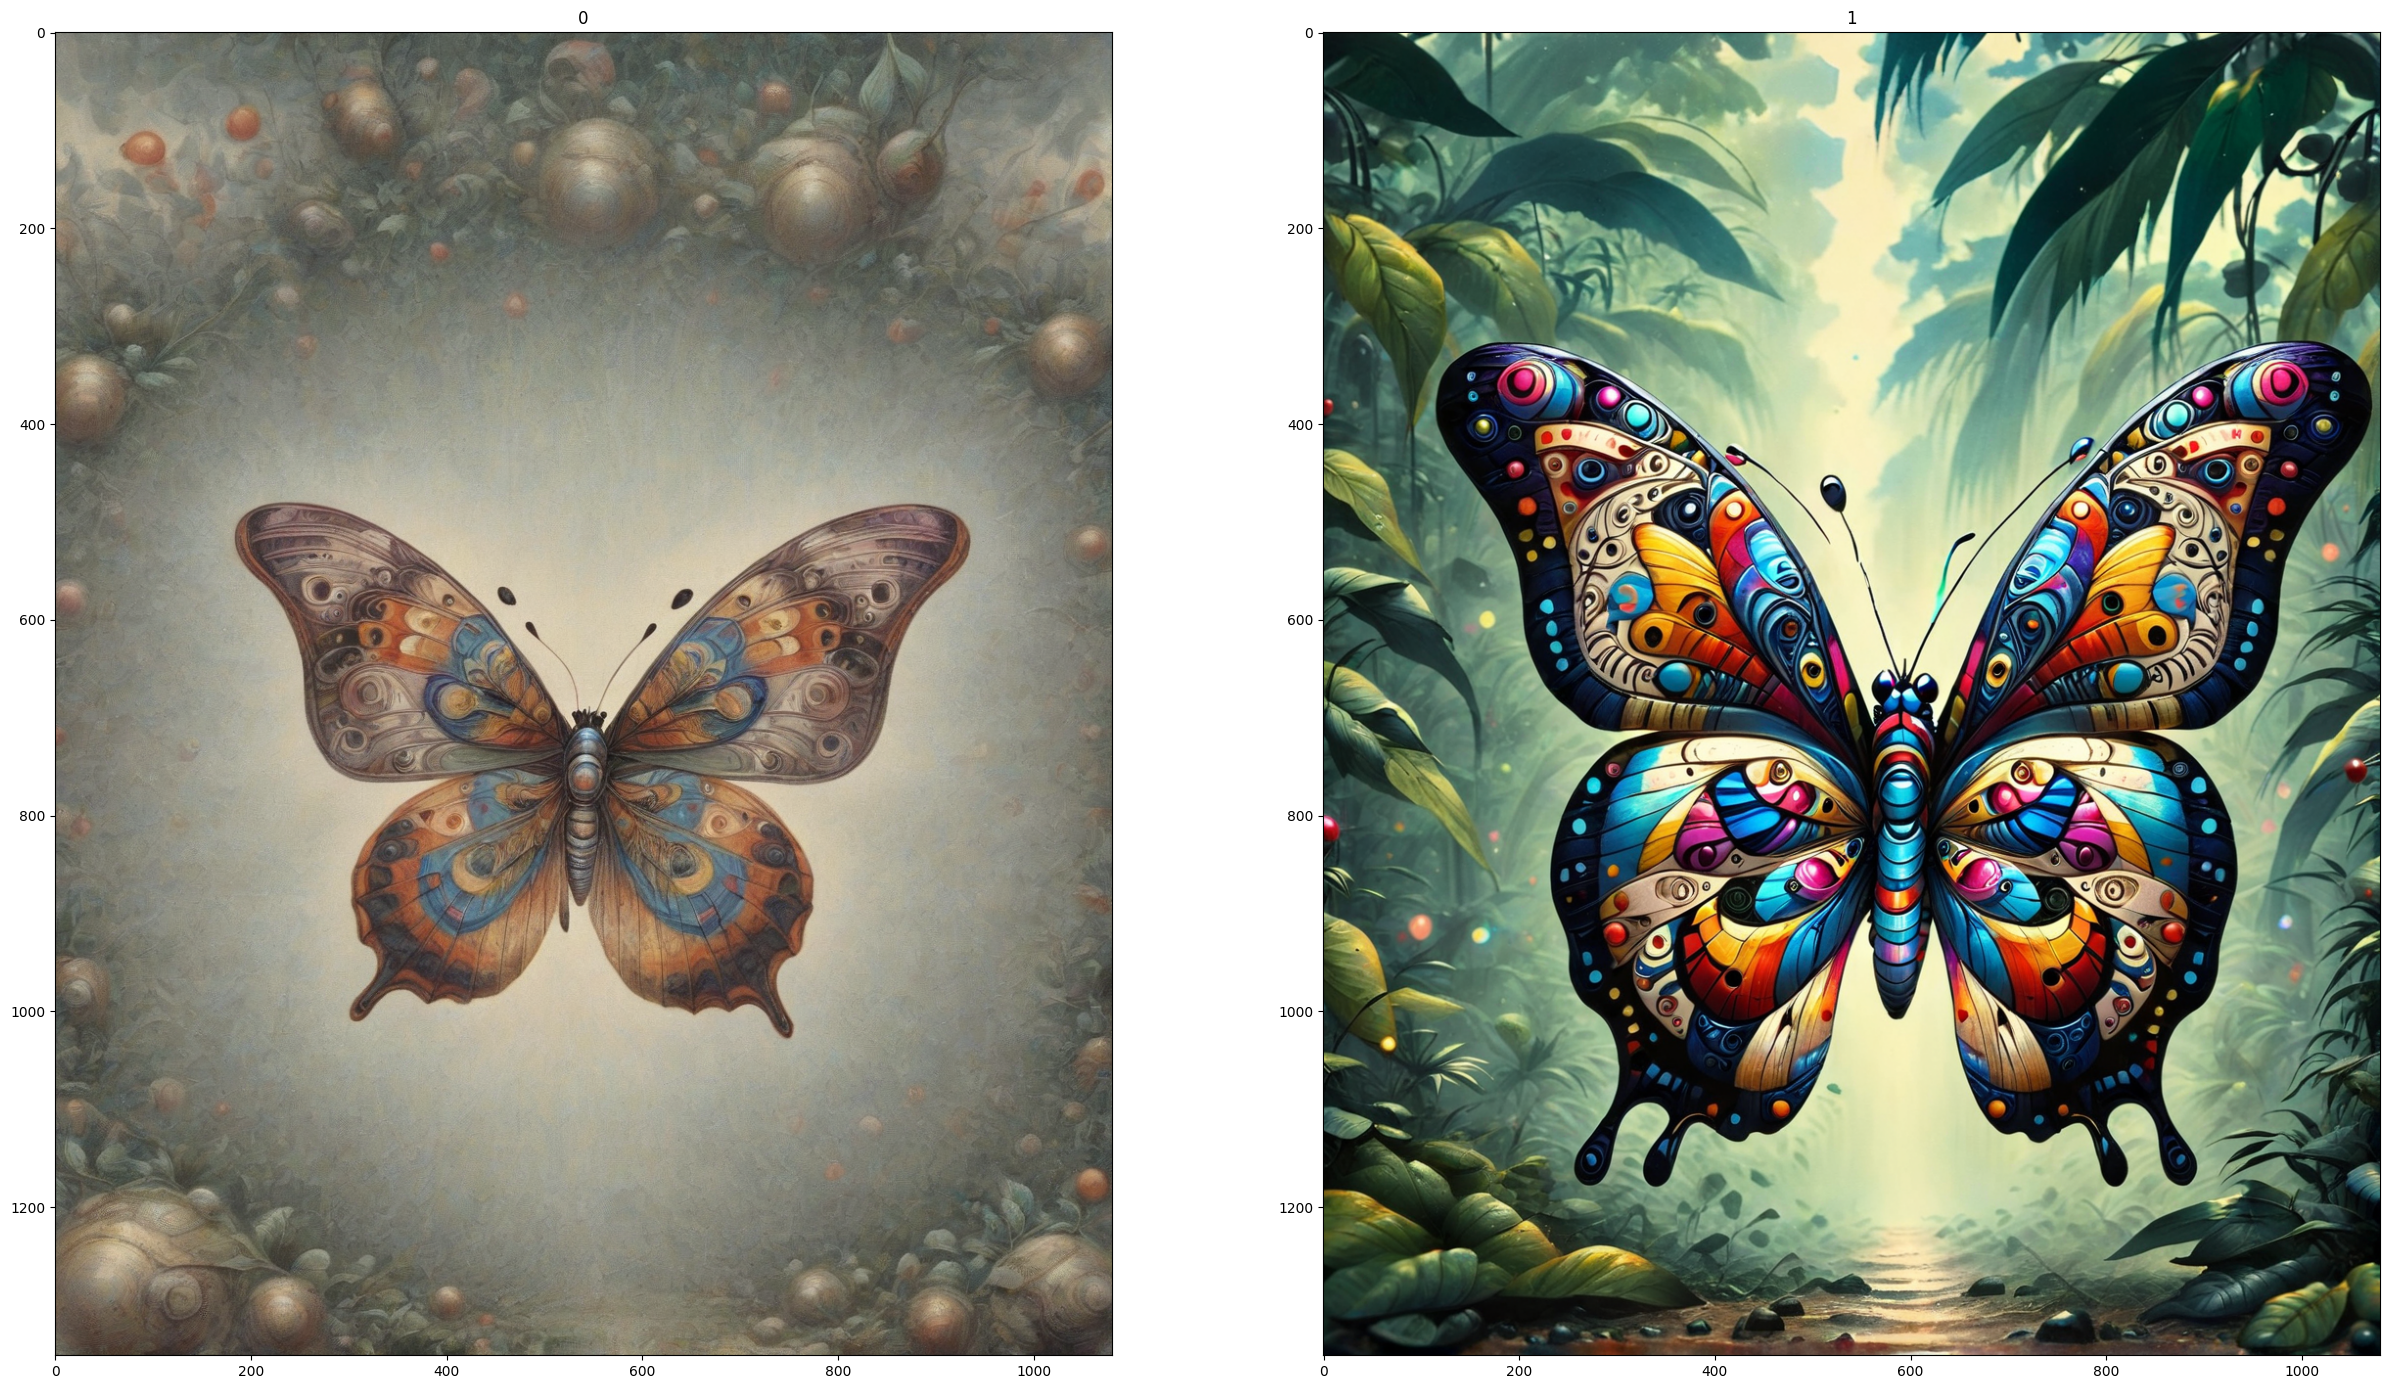

In [7]:
sdxl_gen.show_images(sdxl_gen.get_images_from_pipe_output(sdxl_outputs), 10)

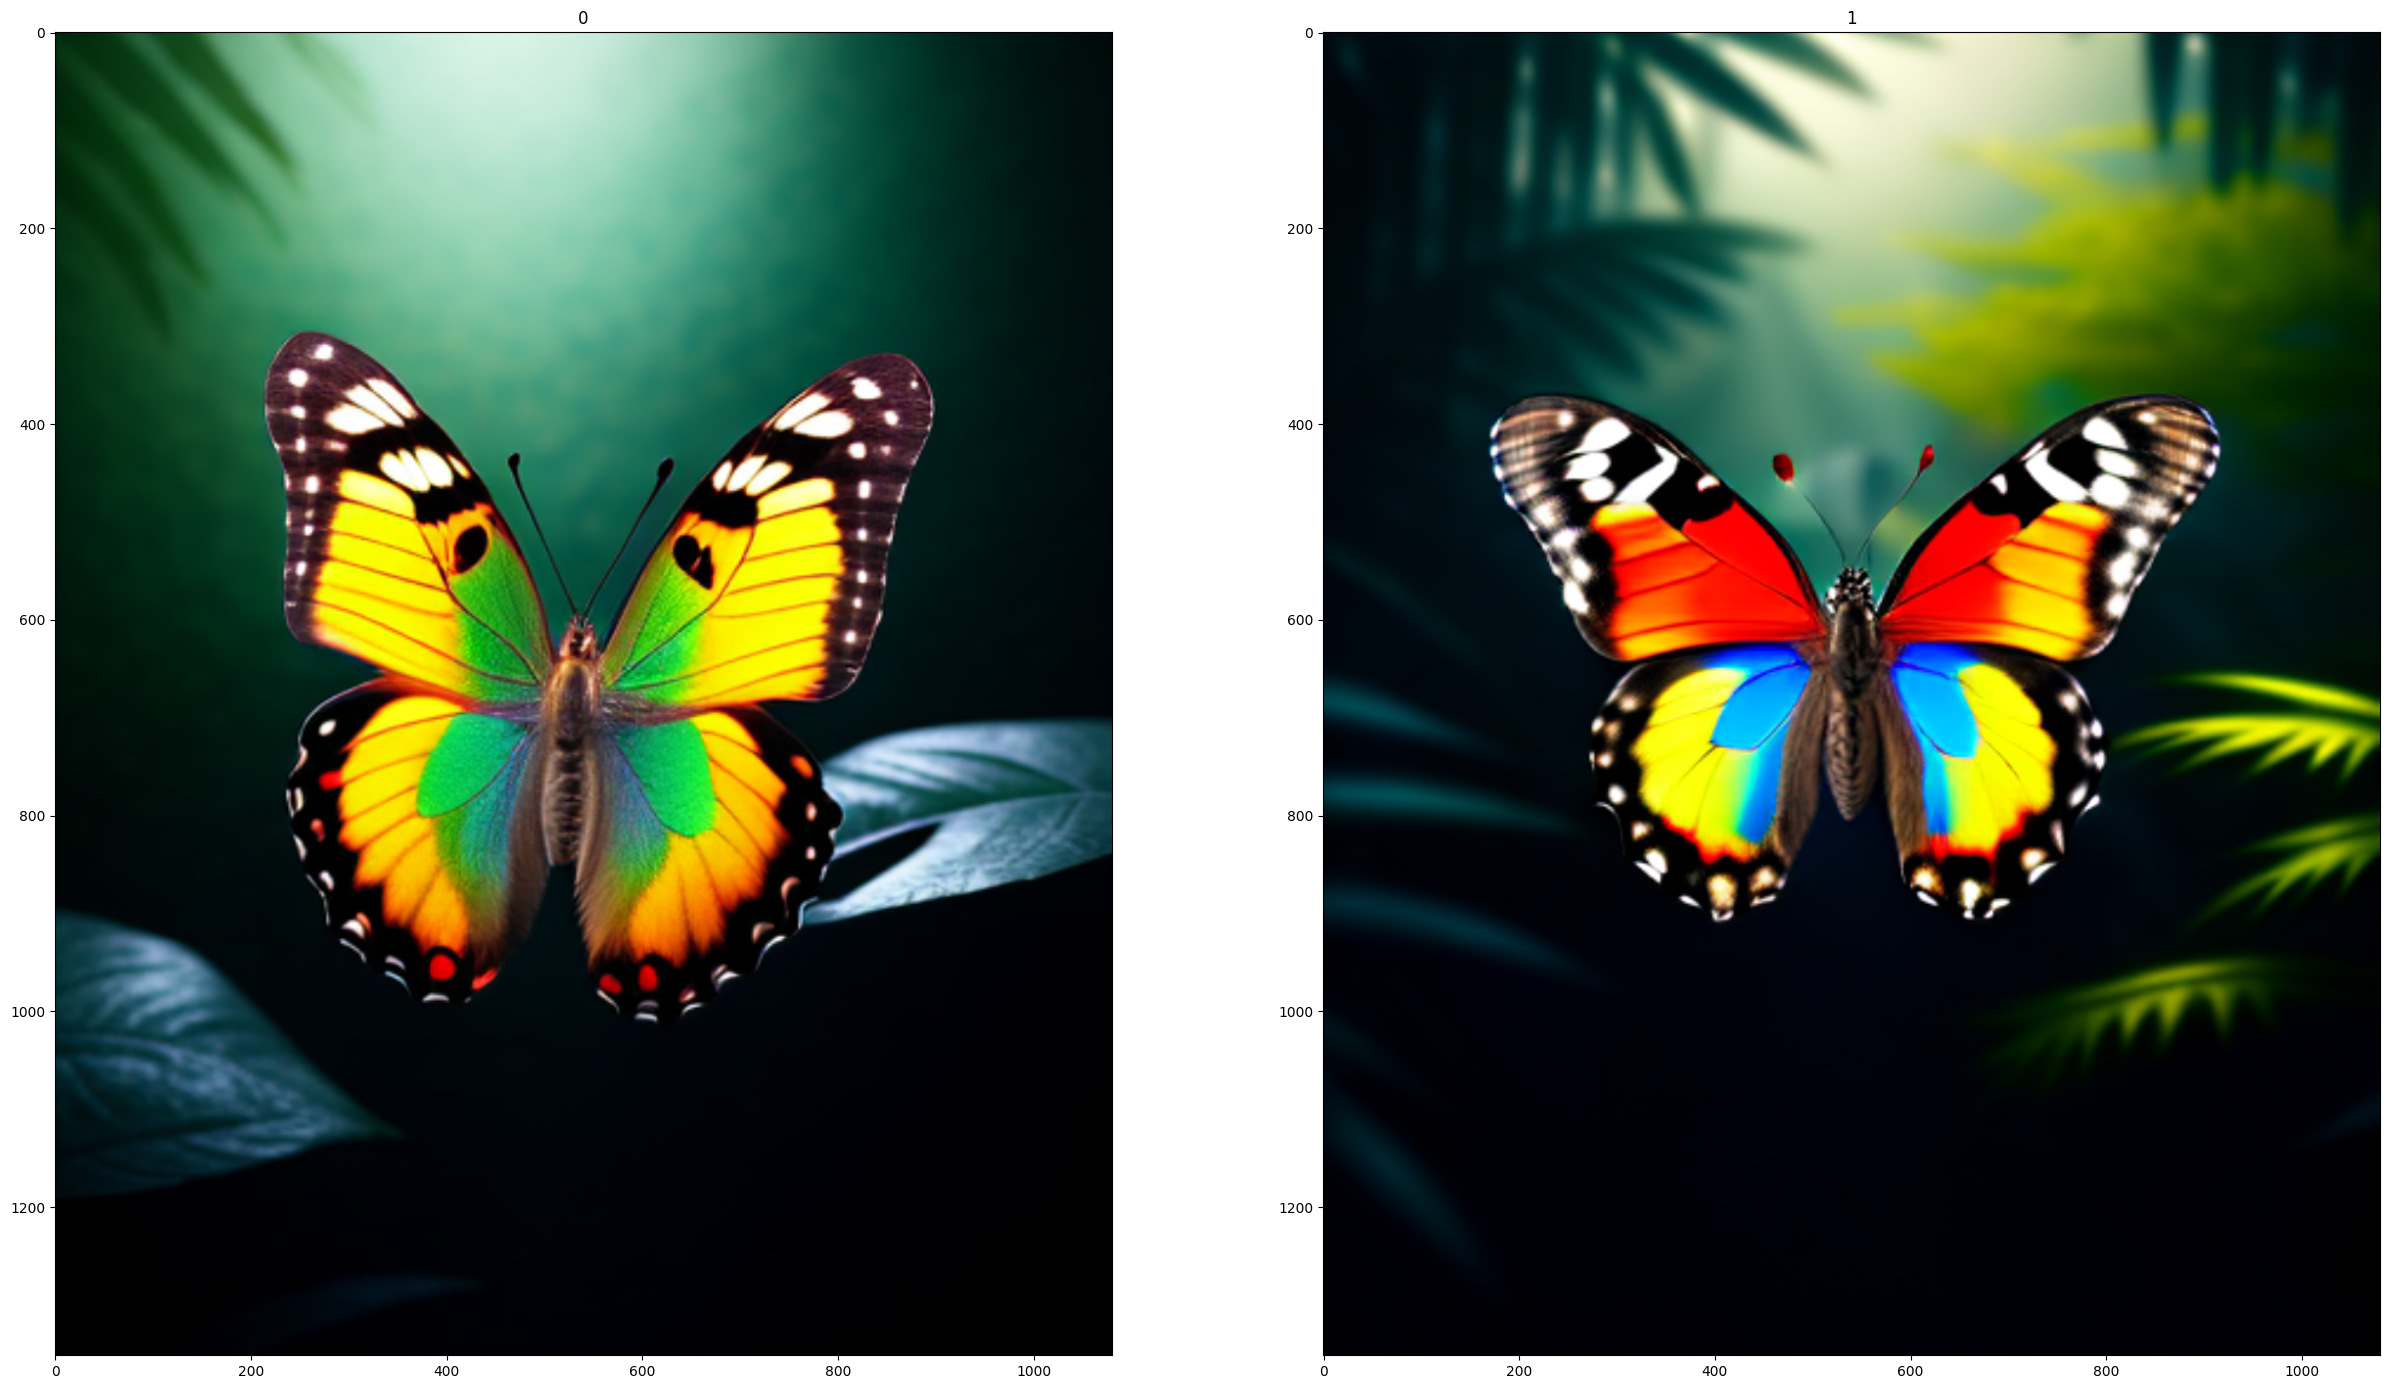

In [5]:
sana_gen.show_images(sana_gen.get_images_from_pipe_output(sana_outputs), 10)